In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc("font",family=font_name)

import matplotlib as mlp
mlp.rcParams['axes.unicode_minus'] = False

import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

import urllib.request as req 
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests
from selenium import webdriver

# 셀프 주유소는 과연 저렴한가?

+ 실제 셀프 주유소가 저렴한지에 대한 팩트 체크
+ 가장 싼 주유소는 어디인가?
+ http://www.opinet.co.kr

### 1. 서울시 구별 주유소 가격 정보 가져오기

#### 1) sample code

In [7]:
##### 원격 제어 

driver = webdriver.Chrome('C:/Users/leewy/Downloads/chromedriver_win32/chromedriver')
driver.get('https://www.opinet.co.kr/searRgSelect.do')

In [8]:
##### 시 목록 가져오기

si_list_raw = driver.find_element_by_xpath('''//*[@id="SIDO_NM0"]''')
si_list = si_list_raw.find_elements_by_tag_name('option')
#print(si_list)
si_list[1].get_attribute('value')

si_names = [i.get_attribute('value') for i in si_list]
si_names.remove('')
print(si_names)


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="SIDO_NM0"]"}
  (Session info: chrome=91.0.4472.101)


In [5]:
##### 시 선택하기

element = driver.find_element_by_id('SIDO_NM0')
element.send_keys(si_names[0])

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="SIDO_NM0"]"}
  (Session info: chrome=91.0.4472.101)


In [72]:
##### 구 목록 가져오기

gu_names = []
gu_list_raw = driver.find_element_by_xpath('''//*[@id="SIGUNGU_NM0"]''')
gu_list = gu_list_raw.find_elements_by_tag_name('option')
gu_list[1].get_attribute('value')

gu_names = [i.get_attribute('value') for i in gu_list]
gu_names.remove('')

gu_names

element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[0])

In [73]:
##### 조회버튼 누르기

driver.find_element_by_xpath('''//*[@id="searRgSelect"]/span''').click()

In [75]:
##### 엑셀저장버튼 누르기

driver.find_element_by_xpath('''//*[@id="glopopd_excel"]/span''').click()

#### 2) 지역별(구별) 로 주유소 정보를 엑셀파일로 저장

In [80]:
from tqdm import tqdm_notebook
import time

In [82]:
si_list_raw = driver.find_element_by_xpath('''//*[@id="SIDO_NM0"]''')
si_list = si_list_raw.find_elements_by_tag_name('option')
#print(si_list)
si_list[1].get_attribute('value')

si_names = [i.get_attribute('value') for i in si_list]
si_names.remove('')
print(si_names)

element = driver.find_element_by_id('SIDO_NM0')
# element.send_keys(si_names[0])

gu_names = []

for i in si_names:
    element.send_keys(si_names[i])
    
    gu_list_raw = driver.find_element_by_xpath('''//*[@id="SIGUNGU_NM0"]''')
    gu_list = gu_list_raw.find_elements_by_tag_name('option')

    gu_names = [i.get_attribute('value') for i in gu_list]
    gu_names.remove('')

    gu_names

    element = driver.find_element_by_id('SIGUNGU_NM0')
    for j in gu_names:
    element.send_keys(gu_names[j])

    

IndentationError: expected an indented block (<ipython-input-82-3e3ea2b1aa43>, line 28)

In [81]:
for j in tqdm_notebook(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(j)
    
    time.sleep(1)
    
    driver.find_element_by_xpath('''//*[@id="searRgSelect"]/span''').click()
    
    time.sleep(1)
    
    driver.find_element_by_xpath('''//*[@id="glopopd_excel"]/span''').click()
    
    time.sleep(1)
    

In [76]:
for j in gu_names:
        element = driver.find_element_by_id('SIGUNGU_NM0')
        element.send_keys(j)

## 2. Data Preprocessing

#### 1)저장된 엑셀 파일 불러오기

In [9]:
from glob import glob

In [10]:
#glob('data/oil/지역*.xls')
station_files = glob('data/oil/*')
station_files

tmp_raw = []
for i in station_files:
    tmp = pd.read_excel(i,header=2)
    tmp_raw.append(tmp)
    

In [11]:
len(tmp_raw)

25

In [12]:
##### 데이터 프레임으로 합치기

station_raw = pd.concat(tmp_raw)
station_raw.head()
station_raw.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 38
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      486 non-null    object
 1   상호      486 non-null    object
 2   주소      486 non-null    object
 3   상표      486 non-null    object
 4   전화번호    486 non-null    object
 5   셀프여부    486 non-null    object
 6   고급휘발유   486 non-null    object
 7   휘발유     486 non-null    object
 8   경유      486 non-null    object
 9   실내등유    486 non-null    object
dtypes: object(10)
memory usage: 41.8+ KB


In [13]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'],'주소':station_raw['주소'],
              '가격':station_raw['휘발유'],'셀프':station_raw['셀프여부'],
              '상표':station_raw['상표']})

stations.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635,Y,현대오일뱅크
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635,Y,GS칼텍스
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638,N,GS칼텍스


In [14]:
##### 구 컬럼 추출

stations['구'] = [i.split()[1] for i in stations['주소']]
stations

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635,Y,현대오일뱅크,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635,Y,GS칼텍스,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638,N,GS칼텍스,강동구
...,...,...,...,...,...,...
34,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),2069,N,GS칼텍스,강남구
35,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113,N,GS칼텍스,강남구
36,뉴서울(강남),서울 강남구 언주로 716,2195,N,SK에너지,강남구
37,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


In [15]:
stations['구'].unique()

print(len(stations['구'].unique()))

25


In [16]:
stations['가격'].unique()

a = stations[stations['가격']=='-']

stations = stations[stations['가격'] != '-']


In [17]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 36
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  474 non-null    object
 1   주소         474 non-null    object
 2   가격         474 non-null    object
 3   셀프         474 non-null    object
 4   상표         474 non-null    object
 5   구          474 non-null    object
dtypes: object(6)
memory usage: 25.9+ KB


In [18]:
stations['가격'] = [float(val) for val in stations['가격']]
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 36
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  474 non-null    object 
 1   주소         474 non-null    object 
 2   가격         474 non-null    float64
 3   셀프         474 non-null    object 
 4   상표         474 non-null    object 
 5   구          474 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.9+ KB


In [19]:
##### 인덱스 조정

stations.reset_index(inplace=True)
del stations['index']
stations

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603.0,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635.0,Y,현대오일뱅크,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635.0,Y,GS칼텍스,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638.0,N,GS칼텍스,강동구
...,...,...,...,...,...,...
469,경원주유소,서울 강남구 도산대로 428 (청담동),2056.0,N,S-OIL,강남구
470,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,2068.0,N,GS칼텍스,강남구
471,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),2069.0,N,GS칼텍스,강남구
472,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113.0,N,GS칼텍스,강남구


### 3. EDA

#### 1) 셀프 여부에 따른 가격 차이

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

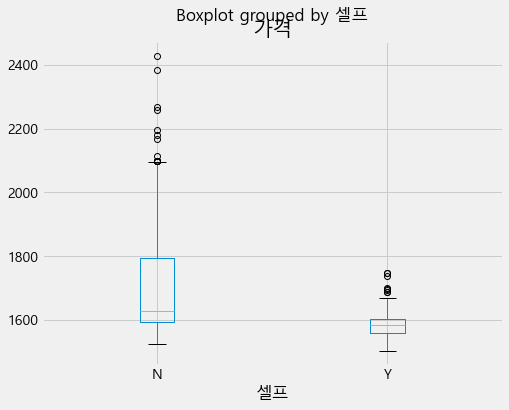

In [21]:
stations.boxplot(by='셀프',column='가격',figsize=(8,6))

#### 2) 주유소의 상표별로 얼마나 저렴한가?

<AxesSubplot:xlabel='상표', ylabel='가격'>

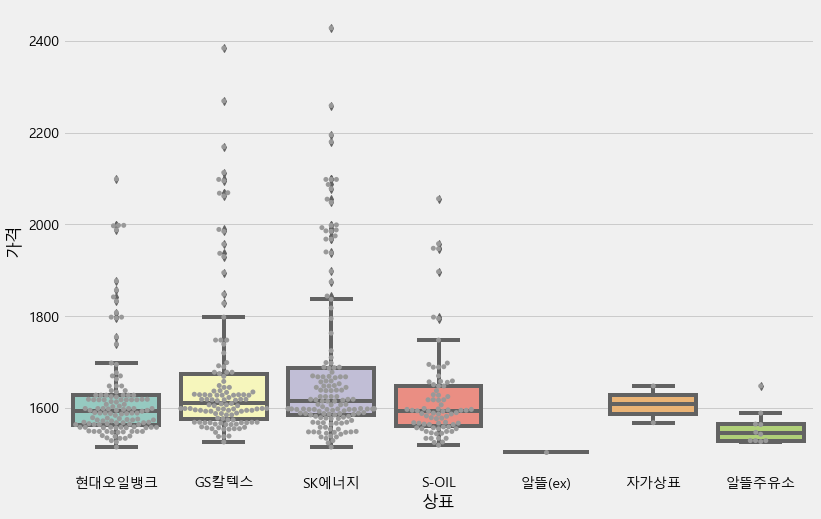

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x = '상표',y = '가격', data = stations, palette='Set3')
sns.swarmplot(x='상표',y = '가격', data = stations, color='.6')

#### 3) 구별 주유 가격 확인

In [33]:
##### 서울시에서 가장 주유가격이 비싼곳은 어디인가?(10개만 확인)
stations.sort_values(by='가격',ascending=False).head(10)


,Oil_store,주소,가격,셀프,상표,구
294,서남주유소,서울 중구 통일로 30,2428.0,N,SK에너지,중구
259,서계주유소,서울 용산구 청파로 367 (서계동),2384.0,N,GS칼텍스,용산구
293,필동주유소,서울 중구 퇴계로 196 (필동2가),2269.0,N,GS칼텍스,중구
292,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2259.0,N,SK에너지,중구
473,뉴서울(강남),서울 강남구 언주로 716,2195.0,N,SK에너지,강남구
258,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2180.0,N,SK에너지,용산구
291,약수주유소,서울 중구 다산로 173,2169.0,N,GS칼텍스,중구
472,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113.0,N,GS칼텍스,강남구
233,현대오일뱅크㈜직영 여의도현대주유소,서울 영등포구 의사당대로 154 (여의도동),2099.0,N,현대오일뱅크,영등포구
283,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2098.0,N,GS칼텍스,종로구


In [35]:
stations.sort_values(by='가격').head(10)


,Oil_store,주소,가격,셀프,상표,구
73,만남의광장주유소,서울 서초구 양재대로12길 73-71,1504.0,Y,알뜰(ex),서초구
207,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1515.0,Y,SK에너지,영등포구
208,영등포제일셀프주유소,서울 영등포구 가마산로 379,1515.0,Y,현대오일뱅크,영등포구
209,성락주유소,서울 영등포구 가마산로 414 (신길동),1519.0,Y,S-OIL,영등포구
181,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1524.0,N,SK에너지,양천구
182,현대주유소,서울 양천구 남부순환로 372 (신월동),1525.0,Y,S-OIL,양천구
234,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1526.0,Y,S-OIL,강북구
235,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1526.0,Y,현대오일뱅크,강북구
236,수유동주유소,서울 강북구 도봉로 395 (수유동),1526.0,Y,GS칼텍스,강북구
125,원천주유소,서울 성북구 돌곶이로 142 (장위동),1527.0,N,알뜰주유소,성북구


In [37]:
##### 구별로 평균값 산출

gu_mean = pd.pivot_table(stations, index=['구'],values=['가격'])
gu_mean.head()

,가격
구,
강남구,1791.270270
강동구,1682.437500
강북구,1548.153846
강서구,1598.696970
관악구,1626.687500


In [46]:
##### 위의 평균값을 지도로 표시
import folium
import json

map = folium.Map(location=[37.497911,127.027558],zoom_start=10)

geo_path = 'data/seoul/skorea_municipalities_geo_simple_seoul.json'
geo_enc = json.load(open(geo_path, encoding='utf-8'))

map.choropleth(geo_data=geo_enc,data=gu_mean, key_on = 'feature.id',
              columns=[gu_mean.index,'가격'],fill_color='YlGn')

map

#### 4) 주유가격 상하위 10씩을 지도에 표시

In [56]:
oil_price_10 = stations.sort_values(by='가격',ascending=False).head(10)
oil_price_b10 = stations.sort_values(by='가격').head(10)


In [61]:
##### 샘플 코드

import requests

header = {'Authorization':'KakaoAK e57b23a69aeee976f416848e9d4d2c6d'}
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format('서울 용산구 청파로 367 서계동')

#requests.get(url, headers=header).json()['documents'][0]['address_name']
requests.get(url,headers=header).json()


{'documents': [],
 'meta': {'is_end': True,
  'pageable_count': 0,
  'same_name': {'keyword': '서울 용산구 청파로 367 서계동',
   'region': [],
   'selected_region': ''},
  'total_count': 0}}

In [57]:
oil_price_10['주소']

294                서울 중구 통일로 30
259        서울 용산구 청파로 367 (서계동)
293       서울 중구  퇴계로 196 (필동2가)
292        서울 중구 퇴계로 228 (필동2가)
473              서울 강남구 언주로 716
258     서울 용산구 한강대로104길 6 (동자동)
291               서울 중구 다산로 173
472       서울 강남구 봉은사로 433 (삼성동)
233    서울 영등포구 의사당대로 154 (여의도동)
283         서울 종로구 사직로 65 (사직동)
Name: 주소, dtype: object

In [64]:
[i.split('(')[0] for i in oil_price_10['주소']]

['서울 중구 통일로 30',
 '서울 용산구 청파로 367 ',
 '서울 중구  퇴계로 196 ',
 '서울 중구 퇴계로 228 ',
 '서울 강남구 언주로 716',
 '서울 용산구 한강대로104길 6 ',
 '서울 중구 다산로 173',
 '서울 강남구 봉은사로 433 ',
 '서울 영등포구 의사당대로 154 ',
 '서울 종로구 사직로 65 ']

In [81]:
lat = []
lng = []

for i in oil_price_10.index:
    tmp_addr = oil_price_10['주소'][i].split('(')[0]
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(tmp_addr)
    
    lng.append(requests.get(url,headers=header).json()['documents'][0]['x'])
    lat.append(requests.get(url,headers=header).json()['documents'][0]['y'])
    



In [83]:
oil_price_10['lat'] = lat
oil_price_10['lng'] = lng



In [92]:
lat = []
lng = []

for i in oil_price_b10.index:
    tmp_addr = oil_price_b10['주소'][i].split('(')[0]
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(tmp_addr)
    
    lng.append(requests.get(url,headers=header).json()['documents'][0]['x'])
    lat.append(requests.get(url,headers=header).json()['documents'][0]['y'])
    

In [96]:
oil_price_b10['lat'] = lat
oil_price_b10['lng'] = lng
print(lat)

['37.4594852424923', '37.501617839067855', '37.5023384820066', '37.5038368985826', '37.5370183706843', '37.5339080509165', '37.64012944951949', '37.63159701187975', '37.6421578125699', '37.61494535403711']


In [97]:
map = folium.Map(location=[37.497911,127.027558],zoom_start=11)

for n in oil_price_10.index:
    folium.CircleMarker(location=[oil_price_10['lat'][n], oil_price_10['lng'][n]],
                       popup=oil_price_10['Oil_store'][n],
                       radius=10,
                       color='#CD3181',fill_color='#CD3181',fill=True).add_to(map)

for n in oil_price_b10.index:
    folium.CircleMarker(location=[oil_price_b10['lat'][n], oil_price_b10['lng'][n]],
                       popup=oil_price_b10['Oil_store'][n],
                       radius=10,
                       color='#3186CC',fill_color='#3186CC',fill=True).add_to(map)

map